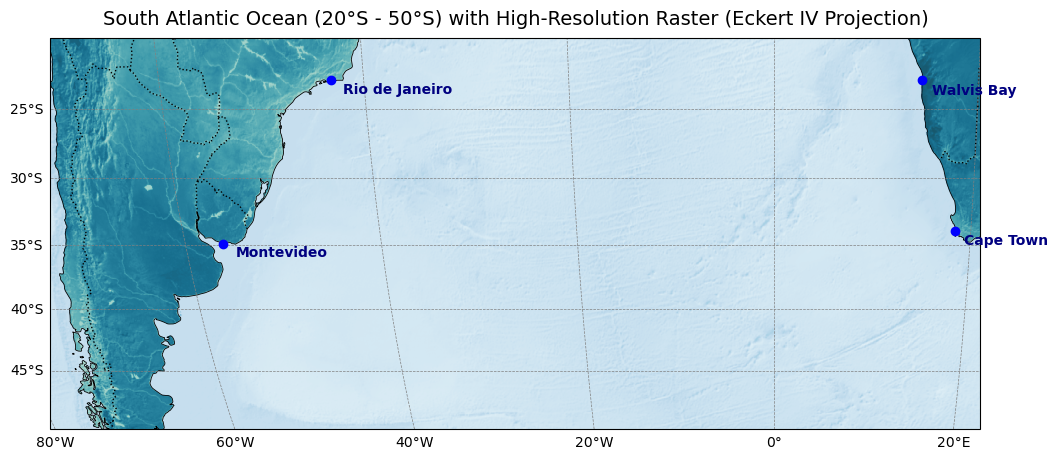

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.enums import Resampling
from rasterio.plot import show
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.warp import reproject, Resampling

# **🔹 Load and Downsample Raster Image for Speed**
tif_file = "/Users/heiketihen/THNHAN002-SCDM2025/P3/NE2_HR_LC_SR_W_DR/NE2_HR_LC_SR_W_DR.tif"

def plot_raster(ax, tif_file):
    """Load and reproject raster image to match Eckert IV projection"""
    with rasterio.open(tif_file) as src:
        # Downsample image for faster loading
        img = src.read(1, out_shape=(src.height // 4, src.width // 4), resampling=Resampling.bilinear)
        extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
        
        # Plot raster (PlateCarree for correct positioning)
        ax.imshow(img, extent=extent, origin="upper", transform=ccrs.PlateCarree(), 
                  cmap="Blues", alpha=0.7)  # **Light blue ocean**

# **🔹 Create Figure and Axis with Eckert IV Projection**
fig2 = plt.figure(figsize=(12, 8))
ax2 = plt.axes(projection=ccrs.EckertIV())  # **🌍 Eckert IV Projection**
ax2.set_extent([-70, 20, -50, -20], crs=ccrs.PlateCarree())

# **🔹 Overlay Raster Image**
plot_raster(ax2, tif_file)

# **🔹 Add Geographic Features**
ax2.add_feature(cfeature.LAND, facecolor="mediumseagreen")  # **Green land**
ax2.add_feature(cfeature.OCEAN, facecolor="lightblue")  # **Light blue ocean**
ax2.add_feature(cfeature.COASTLINE, edgecolor="black", linewidth=0.6)
ax2.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="black")

# **🔹 Add Gridlines**
gl = ax2.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
gl.top_labels = False
gl.right_labels = False

# **🔹 Define Cities and Plot Them**
cities = {
    "Walvis Bay": (14.5058, -22.9389),
    "Cape Town": (18.4241, -33.9249),
    "Rio de Janeiro": (-43.1729, -22.9068),
    "Montevideo": (-56.1645, -34.9011)
}

# **🔹 Plot Cities and Labels**
for city, (lon, lat) in cities.items():
    ax2.plot(lon, lat, 'bo', markersize=6, transform=ccrs.PlateCarree(), label=city)  # **Blue markers**
    ax2.text(lon + 1, lat - 1, city, fontsize=10, transform=ccrs.PlateCarree(), 
             fontweight="bold", color="navy")  # **Navy blue labels for better readability**

# **🔹 Final Title and Show Map**
ax2.set_title('South Atlantic Ocean (20°S - 50°S) with High-Resolution Raster (Eckert IV Projection)', fontsize=14, pad=10)

plt.pause(0.1)  # **Ensure it renders properly**
plt.show()
